![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [263]:
my_folder = "/content/drive/MyDrive/Semestre 7/AI II/SAS_CORTEX"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Semestre 7/AI II/SAS_CORTEX


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [264]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [265]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [266]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [267]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [268]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [269]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [270]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 2521



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Semestre 7/AI II/SAS_CORTEX/sascfg_personal.py
WORK Path             = /saswork/SAS_work762300015699_odaws01-usw2.oda.sas.com/SAS_work67A900015699_odaws01-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 87705


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [271]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 04:29:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 04:29:00 PM

33         


For local Jupyter

In [272]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [273]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [274]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
#data_merge.head()
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
225714,2225715.0,PURDOM,JUAN,0.0,50.0,80400.0,High School,City,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
489875,2489876.0,TINGEY,ANNA,1.0,53.0,16300.0,University / College,Suburban,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Treating Missing Values

Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [275]:
data_merge.isna().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift       663666
MinGift         663666
MaxGift         663666
GaveLastYear         0
AmtLastYear          0
Contact              0
GaveThisYear         0
AmtThisYear          0
dtype: int64

In [276]:
# In this case, we are replacing MinGift with 0.
# You can do the same for what you think is reasonable for dealing with the other variables.
def missing_values(prueba):
#prueba = data_merge

  prueba['MaxGift'] = prueba['MaxGift'].mask(prueba['MaxGift'].isna() , prueba['AmtLastYear'])
  prueba['MinGift'] = prueba['MinGift'].mask(prueba['MinGift'].isna(), prueba['AmtLastYear'])
  prueba['TotalGift'] = prueba['TotalGift'].mask(prueba['TotalGift'].isna(), (prueba['MaxGift'] + prueba['MinGift']))

  prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()) & (prueba['GaveLastYear'] == 1), 1)
  prueba['Recency'] = prueba['Recency'].mask((prueba['Recency'].isna()), prueba['Recency'].median())

  prueba['Frequency'] = prueba['Frequency'].mask((prueba['Frequency'].isna()) & (prueba['GaveLastYear'] == 1), 1)
  prueba['Frequency'] = prueba['Frequency'].mask((prueba['Frequency'].isna()), prueba['Frequency'].median())

  prueba['Seniority'] = prueba['Seniority'].mask((prueba['Seniority'].isna()), prueba['Frequency'])

  return prueba

In [277]:
data_merge = missing_values(data_merge)

## Delete variables

In [278]:
del(data_merge['FirstName'])
del(data_merge['LastName'])

## Trasnformar

In [279]:
df["Education"] = df["Education"].astype('category')
df["City"] = df["City"].astype('category')

df["Education"] = df["Education"].cat.codes
df["City"] = df["City"].cat.codes

## Data Partition

In [280]:
df.columns

Index(['ID', 'Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList',
       'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear',
       'Contact', 'GaveThisYear', 'AmtThisYear'],
      dtype='object')

In [281]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
# train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 
x = df[['ID','Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear','Contact']] 
y = df[['GaveThisYear']]

X_train, X_valid, Y_train, Y_valid = train_test_split(x,y, test_size=0.4, random_state=12345) 

print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(464896, 18)
(309931, 18)
(464896, 1)
(309931, 1)


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Logistic Regression Model

In [314]:
import numpy as np
from sklearn import metrics
def modelMetrics(modelName,model, y_test, prediction):
  print(modelName)
  print("MAE = ",metrics.mean_absolute_error(y_test,prediction))
  print("MSE = ",metrics.mean_squared_error(y_test,prediction))
  print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))
  print("Score = ",model.score(x_test, y_test))

In [282]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [283]:
#you can change the criteria

import numpy as np
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, regr_predict)
print(confusion_matrix)

[[269932     67]
 [ 39902     30]]


In [284]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, regr_predict))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93    269999
         1.0       0.31      0.00      0.00     39932

    accuracy                           0.87    309931
   macro avg       0.59      0.50      0.47    309931
weighted avg       0.80      0.87      0.81    309931



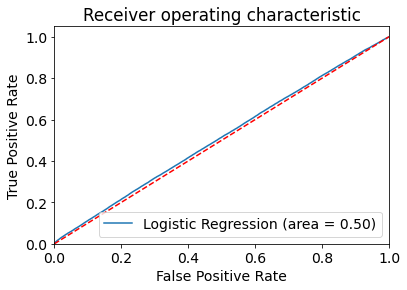

In [285]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, regr.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, regr.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision Tree Model

In [286]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth=5,criterion="entropy").fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.2026628  0.08341219 0.10864332 ... 0.12322808 0.07778622 0.12322808]


In [287]:
#you can change the criteria
import numpy as np
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)

[[267064   2935]
 [ 35091   4841]]


In [288]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93    269999
         1.0       0.62      0.12      0.20     39932

    accuracy                           0.88    309931
   macro avg       0.75      0.56      0.57    309931
weighted avg       0.85      0.88      0.84    309931



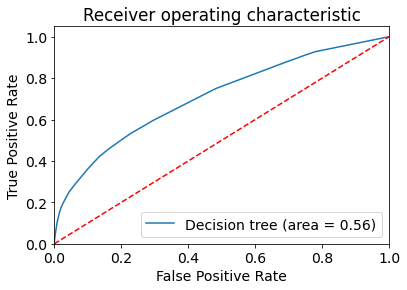

In [289]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## Tunning

In [300]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [308]:
# Hyper parameters range intialization for tuning 
model_DT = DecisionTreeClassifier()
parameters_DT={"splitter":["best","random"],
            "max_depth" : sp_randInt(1,30),
           "min_samples_leaf":sp_randInt(1,30),
           "max_leaf_nodes":sp_randInt(10,100)}

In [309]:
random_tree = RandomizedSearchCV(estimator=model_DT, param_distributions = parameters_DT, cv = 2, n_iter = 10, n_jobs=-1)
random_tree.fit(X_train,Y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_tree.best_estimator_)
print("\n The best score across ALL searched params:\n", random_tree.best_score_)
print("\n The best parameters across ALL searched params:\n", random_tree.best_params_)


 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_depth=16, max_leaf_nodes=78, min_samples_leaf=6)

 The best score across ALL searched params:
 0.8788159072136563

 The best parameters across ALL searched params:
 {'max_depth': 16, 'max_leaf_nodes': 78, 'min_samples_leaf': 6, 'splitter': 'best'}


In [310]:
tuning_DT_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=18, min_samples_leaf=7)
tuning_DT_model.fit(X_train,Y_train)
tuning_DT_predict = tuning_DT_model.predict(X_valid) #Predictions on Testing data

In [311]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, tuning_DT_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93    269999
         1.0       0.61      0.14      0.23     39932

    accuracy                           0.88    309931
   macro avg       0.75      0.56      0.58    309931
weighted avg       0.85      0.88      0.84    309931



## RBG

In [312]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(100, 1000),
              'max_depth'    : sp_randInt(4, 10)
              }

In [313]:
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 2, n_iter = 5, n_jobs=-1)
randm_src.fit(X_train, Y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.17141770707344273, max_depth=6,
                          n_estimators=803, subsample=0.4918222737041339)

 The best score across ALL searched params:
 -0.022785614955705635

 The best parameters across ALL searched params:
 {'learning_rate': 0.17141770707344273, 'max_depth': 6, 'n_estimators': 803, 'subsample': 0.4918222737041339}


In [ ]:
tuned_GBR_model = GradientBoostingRegressor(learning_rate=0.17141770707344273, max_depth=6, n_estimators=803, subsample=0.4918222737041339)
tuned_GBR_model.fit(X_train,Y_train)
tuned_GBR_predict = tuned_GBR_model.predict(X_valid)

modelMetrics("GBR Model",tuned_GBR_model,Y_valid,tuned_GBR_predict)
print(classification_report(Y_valid, tuned_GBR_predict))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

### *Other models may also be helpful for this game*

Reference: https://scikit-learn.org/stable/supervised_learning.html
    

## Scoring New Data

### Prepare data for scoring

In [290]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [291]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

In [292]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

# Treating Missing Values

scoring_data_contact = missing_values(scoring_data_contact)

# TRANSFORMING DATA
scoring_data_contact["Education"] = scoring_data_contact["Education"].astype('category')
scoring_data_contact["City"] = scoring_data_contact["City"].astype('category')

scoring_data_contact["Education"] = scoring_data_contact["Education"].cat.codes
scoring_data_contact["City"] = scoring_data_contact["City"].cat.codes


X = scoring_data_contact[['ID','Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear','Contact']] 
DT_predict_contact=DT_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.353413
1,2000002.0,0.617113
2,2000003.0,0.617113
3,2000004.0,0.304425
4,2000005.0,0.617113


### Predict 'probability of giving' for members who were not contacted

In [293]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact = missing_values(scoring_data_nocontact)

# TRANSFORMING DATA
scoring_data_nocontact["Education"] = scoring_data_nocontact["Education"].astype('category')
scoring_data_nocontact["City"] = scoring_data_nocontact["City"].astype('category')

scoring_data_nocontact["Education"] = scoring_data_nocontact["Education"].cat.codes
scoring_data_nocontact["City"] = scoring_data_nocontact["City"].cat.codes


X = scoring_data_nocontact[['ID','Woman', 'Age', 'Salary', 'Education', 'City', 'SeniorList','NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority',
       'TotalGift', 'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear','Contact']] 
DT_predict_nocontact=DT_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.144140
1,2000002.0,0.123228
2,2000003.0,0.046851
3,2000004.0,0.046851
4,2000005.0,0.046851


In [294]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
238118,2238119.0,0.304425,0.083412
661714,2661715.0,0.152286,0.121708
812954,2812955.0,0.239644,0.046851
71735,2071736.0,0.445630,0.046851
911534,2911535.0,0.304425,0.046851
540590,2540591.0,0.353413,0.046851
618241,2618242.0,0.237752,0.077786
693303,2693304.0,0.353413,0.230967
852086,2852087.0,0.304425,0.083412
490755,2490756.0,0.304425,0.077786


## Exporting Results to a CSV File

In [295]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [296]:
import pandas as pd

NB = 100000

probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [297]:
# Export the final csv file

submission = raw_submission.head(NB)

submission.to_csv('Round2 Output final.csv', index=False)


In [ ]:
# Congratulations! You are now done with Round 2. You are ready to prepare your solution to upload it to the leaderboard.

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.

In [298]:
submission2 = submission['ID'].astype(int)
submission2.to_csv('Round2 Output final.csv', index=False)

In [299]:
!head Round2\ Output\ final.csv

ID
2270643
2074508
2104922
2787549
2601972
2371231
2376438
2633425
2449488
